In [1]:
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
%matplotlib inline

In [2]:
def draw_pdf_plots(mean_b=3,
                   mean_sb=-4,
                   sigma_b=1,
                   sigma_sb=2,
                   xlim=(-10,8),
                   ymax=0.42):
    x=np.linspace(xlim[0], xlim[1], 10*(xlim[1] - xlim[0]))
    
    ax = plt.axes(xlim=xlim, ylim=(0,ymax))
    ax.set_xlabel('q', fontsize=16)
    ax.set_ylabel('Probability density', fontsize=16)

    clb = mlab.normpdf(x, mean_b, sigma_b)
    clsb = mlab.normpdf(x, mean_sb, sigma_sb)

    plt.plot(x, clb, color='red')
    plt.plot(x, clsb, color='blue')

    plt.fill_between(x, clb, 0, facecolor='red', alpha=0.5)
    plt.fill_between(x, clsb, 0, facecolor='blue', alpha=0.5)

    fill_b = plt.Rectangle((0, 0), 1, 1, fc="red", alpha=0.5)
    fill_sb = plt.Rectangle((0, 0), 1, 1, fc="blue", alpha=0.5)

    leg = plt.legend([fill_sb, fill_b],
                     ['Signal+background', 'Background only'],
                     fancybox=True, loc='best')

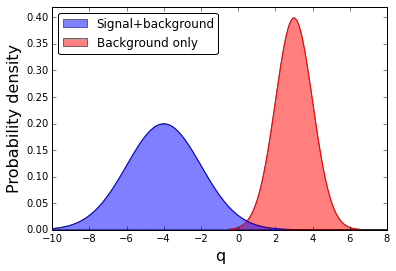

In [3]:
draw_pdf_plots()
plt.savefig('pdf_large_separation.pdf', bbox_inches='tight')

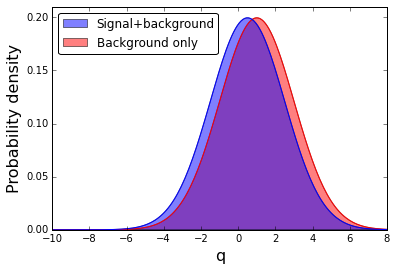

In [4]:
draw_pdf_plots(mean_b=1, mean_sb=0.5,
               sigma_b=2, sigma_sb=2,
               xlim=(-10,8), ymax=0.21)
plt.savefig('pdf_small_separation.pdf', bbox_inches='tight')

In [8]:
def draw_cls_plots(mean_b=3,
                   mean_sb=-4,
                   sigma_b=2,
                   sigma_sb=3,
                   observation=-1,
                   xlim=(-12,10),
                   ymax=0.21):
    x=np.linspace(xlim[0], xlim[1], 10*(xlim[1] - xlim[0]))
    
    ax = plt.axes(xlim=xlim, ylim=(0,ymax))
    ax.set_xlabel('q', fontsize=16)
    ax.set_ylabel('Probability density', fontsize=16)

    clb = mlab.normpdf(x, mean_b, sigma_b)
    clsb = mlab.normpdf(x, mean_sb, sigma_sb)

    line_sb = plt.plot(x, clsb, color='blue', label='Signal+background')
    line_b = plt.plot(x, clb, color='red', label='Background-only')
    
    obs = plt.plot([observation, observation],
                   [0, 0.8*ymax],
                   color='black', linewidth=3,
                   label='Observation')

    plt.fill_between(x, clb, 0,
                     where=x<observation,
                     facecolor='yellow',
                     alpha=0.5)
    plt.fill_between(x, clsb, 0,
                     where=x>observation,
                     facecolor='green',
                     alpha=0.5)
    
    text_height = ymax/4.
    arrow_height = ymax/12.
    
    text_loc_sb = observation + (xlim[1]-observation)*7/8.
    text_loc_b = observation + (xlim[0]-observation)/6.

    arrow_loc_sb = observation + (xlim[1]-observation)/8.
    arrow_loc_b = observation + (xlim[0]-observation)/8.

    ax.annotate('$CL_{S+B}$',
                xy=(arrow_loc_sb, arrow_height),
                xytext=(text_loc_sb, text_height),
                fontsize=16,
                arrowprops=dict(color='blue', shrink=0.05,
                                alpha=0.75, frac=0.3),
               horizontalalignment='right')

    ax.annotate('$1-CL_{B}$',
                xy=(arrow_loc_b, arrow_height),
                xytext=(text_loc_b, text_height),
                fontsize=16,
                arrowprops=dict(color='red', shrink=0.05,
                                alpha=0.75, frac=0.3),
               horizontalalignment='right')


    leg = plt.legend(fancybox=True, loc='best')

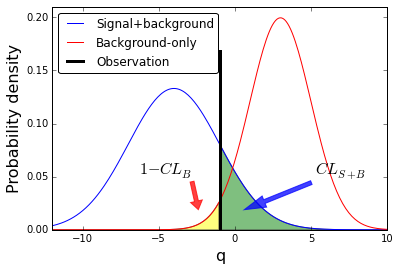

In [9]:
draw_cls_plots()

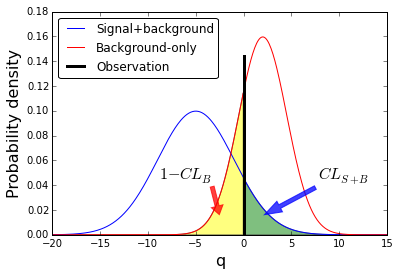

In [10]:
draw_cls_plots(mean_b=2,
               mean_sb=-5,
               sigma_b=2.5,
               sigma_sb=4,
               observation=0.,
               xlim=(-20,15),
               ymax=0.18)
plt.savefig('cls.pdf', bbox_inches='tight')